![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction 

In this task we will be looking at diffrent type of confident interval and see how to do confident interval using python which is extension from one of our <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.gee6dfd142e_0_192">slide</a>

## What will we accomplish?

By the end of the notebook we will be able to :
1. Know diffrent type of confident interval
2. How and when to use the different confident interval
3. Use the formulas of the confident interval

## Notebook Content
* [Part 1 :Propotion Population Confident Interval](#propotion)
    * [Confidence Interval for female population proportion that has heart disease.](#femalepropotion)
    * [Confidence Interval for difference in population propotion .](#diffpropotion)
* [Part 2 :Population Mean Confidence Interval](#meaninterval)
    * [Confidence of the female cholesterol level mean.](#femalemeaninterval)
    * [Confidence Interval for difference in population mean.](#diffmeaninterval)

We will be using mainly pandas and numpy

In [25]:
import pandas as pd
import numpy as np

Dataset can be downloaded at https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [47]:
df = pd.read_csv('../data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In this datasets there is few things that we must understand. The most important on is the "target" column. Target column is the presence of heart disease , which mean if it is 0 there is no heart disease and 1 is the person have heart disease which will be our dichotomus variable. The other important column that we need to know is the "chol" column which so the level of cholestrol of the patient and this is the continuous variable that we will be using for out mean confidence interval.The last important is the "sex" column which 1 = male and 0 = female . 

<a name="propotion"><h3><b>Propotion Population Confident Interval 

We create the population propotion data frame which is person with the heart disease and differentiated by gender

In [27]:
df['gender'] = df.sex.replace({1: "Male", 0: "Female"})

Drop all not available data

In [28]:
data = df[["target", "gender"]].dropna()

In [29]:
pd.crosstab(data.target, data.gender)

gender,Female,Male
target,,
0,86,413
1,226,300


Here we can view in general the distribution of the data. Later in the notebook we will be focusing on female heart dieases presence.

<a name="femalepropotion"><h4><b>Confidence Interval for female population proportion that has heart disease.

Before we continue we will be looking at the overall formula for the propotion population confidece interval. From the <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.geee1b814d6_0_32">learning material</a>. Below is the important part from the slide:  

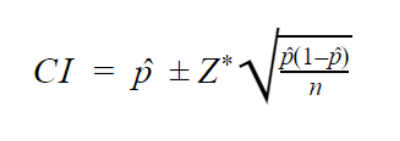

The formula above is the confidence interval formula for propotion population where:

* ˆp = the proportion of the female that have heart disease
* Z*= the critical value of the z-distribution (in our case we use 95% which is 1.96)
* n = the total number of female 



Here we start the first part of the formula where we gather all the variable whihc is ^p and n. Since ^p is the propotion of the female that have heart disease, we will need to divide the number of female that have heart disease with the total number of female. But before that we will get the n which is the total number of female which we will add both female with heart disease with female with no heart disease. All the value we already have from the upper part of the notebook

If compared to the formula , the variable "f_propotion" = ^p and "f" = n

In [30]:
f=86+226
f_propotion = 226/(f)

The we procedd to completing the other portion of the formula which is the square root part of the formula which is called standard error, here we name the portion "se_female". 

In [31]:
se_female = np.sqrt(f_propotion * (1 - f_propotion) / f)
se_female

0.02529714756803247

Lastly we will complete the formula and use lower_interval_FP as the lower interval for our 95% confident level and upper_interval_FP is the upper interval.

Get the 95% confidence level ( the z_score is 1.96 which is available in the table) and use the formula get the interval

In [32]:
z_score = 1.96

lower_interval_FP = f_propotion - z_score* se_female
upper_interval_FP = f_propotion + z_score* se_female

(lower_interval_FP, upper_interval_FP)

(0.6747765651256307, 0.773941383592318)

From the result, the female having heart disease, the lower and upper bounds of the 95% confidence interval are 0.675 and 0.774.

There is multiple method on getting the 95% confidence score and using the stasmodels is on of them

In [33]:
import statsmodels.api as sm
sm.stats.proportion_confint(f * f_propotion, f)

(0.6747774762140357, 0.773940472503913)

We can observe that the result from both calculating using formula and using statsmodels have the same interval for 95% confident level which is (0.6747774762140357, 0.773940472503913) 

<a name="diffpropotion"><h4><b>Confidence Interval for difference in population propotion 

In the next part we will continue the propotion population but now we will take the differnce between male and female that have heart diseases. There is nothing new here beside do a little manipulation on how we get the variable for the formula above. In general we will need the standrad error of the female and male that have the heart disease and that will be our new standard error that wei will be using in the formula. Then we will need to get the diffence in propotion of female and male that have the heart disease which will be our new propotion sample.

Here we first get the male proption with heart disease

In [34]:
m = 399+413 
m_propotion = 399/(m) 

Get the standard error of the male propotion that have heart disease ( see the Confidence interval for proportions
formula )

In [35]:
se_male = np.sqrt(m_propotion * (1 - m_propotion) / m)
se_male

0.01754395197423383

Get the diffrence in standard error between the female and male  

In [36]:
se_diff = np.sqrt(se_female**2 + se_male**2)

Get the proption difference

In [37]:
d_propotion = f_propotion - m_propotion 

The upper and lower interval of the diffrence

In [38]:
lower_interval_DP = d_propotion - z_score* se_diff
upper_interval_DP = d_propotion + z_score* se_diff

(lower_interval_DP, upper_interval_DP)

(0.17264043686346828, 0.29331889116482524)

For the gender difference having heart disease: the lower and upper bounds of the 95% confidence interval are 0.173 and 0.293.


<a name="meaninterval"><h3><b>Population Mean Confidence Interval</b></h3></a>

Population mean confidence interval is another aspect of confidence interval where we deal with the continuos data to get the data confidence interval. For our excersice we will use the cholestrol level in gender as our data. Before we start, we will understand the formula of the confidence interval which is from the <a href="https://docs.google.com/presentation/d/16WMfgdTBOqPd68jjoT1l3-J0lAsi9fcaion2iAmH5kc/edit#slide=id.gf03c99aad1_5_50">slide</a>:

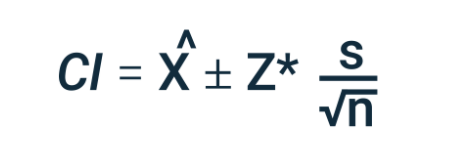

From the formula above: 

* ˆx = the sample mean of cholestrol level
* s = the sample standard deviation/error of cholestrol level

    
<a name="femalemeaninterval"><h4><b>Confidence of the female cholesterol level mean</b></h4></a>

Before we start we will first get the detail of the cholestrol level , and view it by sex as we will be focusing on the female cholestrol level. 

Here we get the mean ,size and standard devation of level of cholestrol between gender

In [39]:
df.groupby("gender").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

The detail of the data is everything we need to fill up the formula.

Get the needed data for the mean confidence interval ( see the formula of the Confidence interval for the mean of normally-distributed data)

We are using 95% confident interval which is z = 1.96

In [40]:
z = 1.96
mean_f = 261.455128  
sd_f = 64.466781     
n_f = 312

Then we will get the standard error of the female cholestrol level which is as discribed as the equation above

To make it clear here is the formula for the standard error:
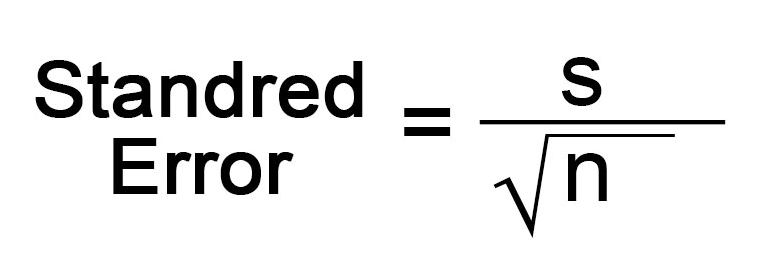

In [1]:
se_f = sd_f /np.sqrt(n_f)

NameError: name 'sd_f' is not defined

Get the intervals for 95% confidence level which using z as 1.96 and using the formula mentioned above.

In [41]:
lower_interval_FM = mean_f - z* se_f  
upper_interval_FM = mean_f + z* se_f  
(lower_interval_FM, upper_interval_FM)

(254.30169095203016, 268.6085650479699)

For the female cholesterol level: the lower and upper bounds of the 95% confidence interval are 254.302 and 268.609.

<a name="diffmeaninterval"><h4><b>Confidence Interval for difference in population mean </b></h4></a>

Next we will do comparison of the cholestrol level for male and female and get the confidence level of the comparision. There are not much diffrence in formula but we need to get the right variable to insert to the formula. The first is we will need the mean differnce of the female and male data which will become our ^X and the 

Get the needed data from above for male population

In [42]:
mean_m = 239.237027  
sd_m = 43.155535     
n_m = 713
se_m = sd_m /np.sqrt(n_m)

Find the standard error using the unpooled approach ( we use the unpooled because the variance between male and women not the same )( see the standard deviation to estimate the variance) 

Here is a quick view on the standard error using unpooled approach:
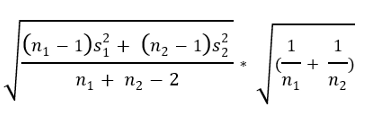
where :
* n1 is the total number female (n_f)
* n2 is the total number of male (n_m)
* s1 is standard error for female (se_f)
* s2 is standard error for male (se_m)

In [43]:
mean_d = mean_f - mean_m

se_d = (np.sqrt((n_f-1)*se_f**2 + (n_m-1)*se_m**2)/(n_f+n_m-2))*(np.sqrt(1/n_f + 1/n_m))

Calculate the interval difference 

In [44]:
lower_interval_DM = mean_d - 1.96*se_d  
upper_interval_DM = mean_d + 1.96*se_d  
(lower_interval_DM, upper_interval_DM)

(22.20802509671433, 22.22817690328565)

From the result we can see the confidence interval for mean diffrence of male and female cholestrol level for 95% confidence level is from 22.20802509671433 to 22.22817690328565 